<a href="https://colab.research.google.com/github/Tdas-christ/DEEP_LEARNING/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import random

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5
NUM_EPOCHS = 5
VALIDATION_SPLIT = 0.2  # 20% of training data will be used for validation

In [44]:
# Data paths
train_data = '/content/drive/MyDrive/DATASETS/Animals_Images_5_classes/Training_set'
test_data = '/content/drive/MyDrive/DATASETS/Animals_Images_5_classes/Test_set'

from PIL import Image

random_image_path = random.choice(os.listdir('path/to/training_dataset'))
Image.open(os.path.join('path/to/training_dataset', random_image_path)).show()

In [45]:
# Data generator for training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT  # Set aside a portion of the training data for validation
)

In [46]:
# Data generator for training data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 250 images belonging to 5 classes.


In [47]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

Found 250 images belonging to 5 classes.


In [48]:
validation_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 0 images belonging to 5 classes.


In [49]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [50]:
# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Define callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),  # Early stopping based on validation loss
    TensorBoard(log_dir='./logs')
]

In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,  # Include validation data here
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 70.0630 - accuracy: 0.2523

7/7 [==============================] - 3s 106ms/step - loss: 70.0630 - accuracy: 0.2523
Epoch 2/5
7/7 [==============================] - ETA: 0s - loss: 17.5273 - accuracy: 0.4908

7/7 [==============================] - 1s 135ms/step - loss: 17.5273 - accuracy: 0.4908
Epoch 3/5
7/7 [==============================] - ETA: 0s - loss: 6.1754 - accuracy: 0.7156

7/7 [==============================] - 1s 135ms/step - loss: 6.1754 - accuracy: 0.7156
Epoch 4/5
7/7 [==============================] - ETA: 0s - loss: 3.1876 - accuracy: 0.7890

7/7 [==============================] - 1s 141ms/step - loss: 3.1876 - accuracy: 0.7890
Epoch 5/5
7/7 [==============================] - ETA: 0s - loss: 2.6115 - accuracy: 0.8532

7/7 [==============================] - 1s 138ms/step - loss: 2.6115 - accuracy: 0.8532


In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


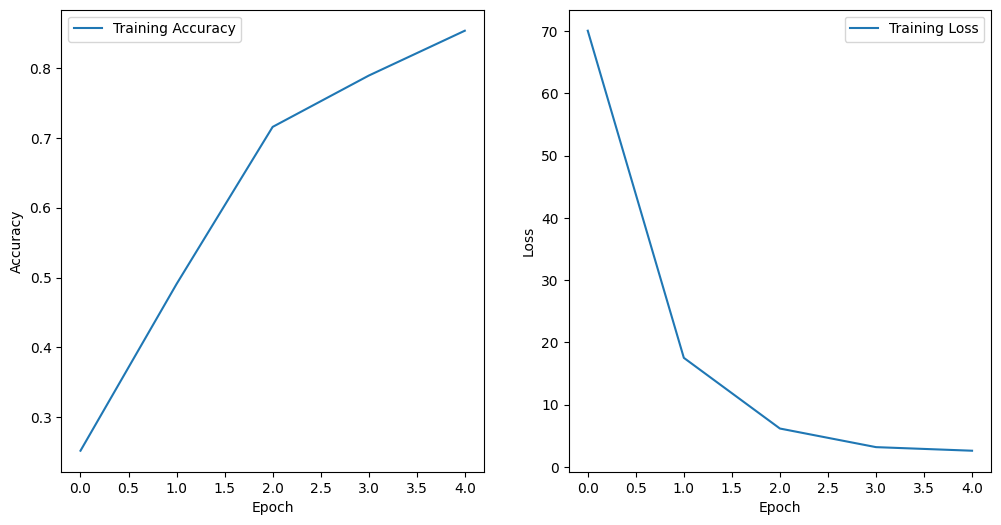

In [54]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate model on test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 117 images belonging to 5 classes.
3/4 [=====================>........] - ETA: 16s - loss: 46.0292 - accuracy: 0.2083